In [2]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
import scipy.stats as st
from scipy import stats

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ABgroup.csv to ABgroup.csv
Saving Cash.csv to Cash.csv
Saving Cheaters.csv to Cheaters.csv
Saving Money.csv to Money.csv
Saving Platforms.csv to Platforms.csv


In [4]:
df = pd.read_csv('ABgroup.csv')
header = list(df.columns)
print("Список имён столбцов:", header)

Список имён столбцов: ['user_id', 'group']


In [5]:
df = pd.read_csv('Cash.csv')
header = list(df.columns)
print("Список имён столбцов:", header)

Список имён столбцов: ['user_id', 'date', 'cash']


In [6]:
df = pd.read_csv('Cheaters.csv')
header = list(df.columns)
print("Список имён столбцов:", header)

Список имён столбцов: ['user_id', 'cheaters']


In [7]:
df = pd.read_csv('Money.csv')
header = list(df.columns)
print("Список имён столбцов:", header)

Список имён столбцов: ['user_id', 'date', 'money']


In [8]:
df = pd.read_csv('Platforms.csv')
header = list(df.columns)
print("Список имён столбцов:", header)

Список имён столбцов: ['user_id', 'platform']


In [9]:
#создание датафрейма cash
df_cash = pd.read_csv('Cash.csv')
del df_cash['date'] #удаляем столбец с датой
df_cash = df_cash.groupby(['user_id'])['cash'].sum().reset_index() #объединяем одинаковые id, суммируем cash, возвращаем в таблицу
df_cash.head()

,user_id,cash
0,00036L-1T885I,7600
1,0004MK-MRBUKF,6150
2,0004MK-VW0O9L,6300
3,0005S4-UEC6BE,5000
4,0007I5-EWUD6O,6350


In [10]:
#создание датафрейма money
df_money = pd.read_csv('Money.csv')
del df_money['date']
df_money = df_money.groupby(['user_id'])['money'].sum().reset_index()
df_money.head()

,user_id,money
0,00036L-1T885I,3.97
1,0004MK-MRBUKF,5.95
2,0004MK-VW0O9L,4.96
3,0005S4-UEC6BE,5.95
4,0007I5-EWUD6O,6.94


In [11]:
#объединение датафреймов cash и money
df_merge = df_cash.merge(df_money, on='user_id')
df_unique = df_merge.drop_duplicates()
df_unique.head()

,user_id,cash,money
0,00036L-1T885I,7600,3.97
1,0004MK-MRBUKF,6150,5.95
2,0004MK-VW0O9L,6300,4.96
3,0005S4-UEC6BE,5000,5.95
4,0007I5-EWUD6O,6350,6.94


In [12]:
#число юзеров в датафрейме
df_unique.shape[0]

1080000

In [13]:
#создание датафрейма читеров
df_chiters = pd.read_csv('Cheaters.csv')
df_chiters = df_chiters.loc[(df_chiters['cheaters'] == 1)] #фильтруем по 1

list_of_chiters = df_chiters['user_id'].tolist() #создадим список с id

df_chiters.head()

,user_id,cheaters
65,9WIF40-OW5GLD,1
778,VIHC8Q-YTCOYH,1
4060,1JBTR8-YEDSAI,1
5520,KK8ZQ3-ZZVKN4,1
6631,IC2BED-VNNI2F,1


In [14]:
print(len(set(list_of_chiters)))

353


In [15]:
#удаление читеров из списка читеров из объединенного датафрейма cash и money
df_unique = df_unique[~df_unique['user_id'].isin(list_of_chiters)]
df_unique.head()

,user_id,cash,money
0,00036L-1T885I,7600,3.97
1,0004MK-MRBUKF,6150,5.95
2,0004MK-VW0O9L,6300,4.96
3,0005S4-UEC6BE,5000,5.95
4,0007I5-EWUD6O,6350,6.94


In [16]:
#количество оставшихся юзеров
df_unique.shape[0]

1079647

In [17]:
#поиск читеров методом поиска квантиля 99
quantile = df_unique['cash'].quantile(0.99)
quantile

np.float64(9350.0)

In [18]:
#создание датафрейма со списком читеров
df_ch = df_unique.loc[(df_unique['cash'] > 9350) & (df_unique['money'] == 0)]
df_ch.head()

,user_id,cash,money
1850,027YD0-7N2S50,203400,0.0
7480,091QZN-XYWQ8D,78500,0.0
11890,0E95BB-LTAHXQ,166000,0.0
13675,0GCX0G-5BZ6HE,122650,0.0
13781,0GH23F-XS6VSB,152150,0.0


In [19]:
#количество найденых читеров
df_ch.shape[0]

344

In [20]:
#удаление читеров
chiter_list = df_ch['user_id'].tolist() #из столбца df список читеров создаем список с читерами
df_unique = df_unique[~df_unique['user_id'].isin(chiter_list)] #удаляем, если противоположно {id юзера есть в списке}, т.е. не в списке
#количество оставшихся пользователей - не читеров
df_unique.shape[0]

1079303

In [21]:
#добавление к таблице столбца платформы
df_platform = pd.read_csv('Platforms.csv')

df_unique = df_unique.merge(df_platform, on='user_id', how='left') #объединим по столбцу user_id, вставим слева от исходных столбцов
df_unique = df_unique.drop_duplicates() #удалим повторяющиеся строки
df_unique.head()

,user_id,cash,money,platform
0,00036L-1T885I,7600,3.97,XBox
8,0004MK-MRBUKF,6150,5.95,PS4
16,0004MK-VW0O9L,6300,4.96,PC
24,0005S4-UEC6BE,5000,5.95,PC
32,0007I5-EWUD6O,6350,6.94,PC


In [22]:
df_unique.shape[0]

1079303

In [23]:
#добавление к таблице столбца группы
df_group = pd.read_csv('ABgroup.csv')
df_unique = df_unique.merge(df_group, on='user_id', how='left')
df_unique = df_unique.drop_duplicates()
df_unique.head()

,user_id,cash,money,platform,group
0,00036L-1T885I,7600,3.97,XBox,control
8,0004MK-MRBUKF,6150,5.95,PS4,control
16,0004MK-VW0O9L,6300,4.96,PC,test
24,0005S4-UEC6BE,5000,5.95,PC,test
32,0007I5-EWUD6O,6350,6.94,PC,test


In [24]:
df_unique.shape[0]

1079303

In [25]:
df_pc = df_unique[df_unique['platform'] == 'PC']
df_xbox = df_unique[df_unique['platform'] == 'XBox']
df_ps4 = df_unique[df_unique['platform'] == 'PS4']

In [26]:
df_pc_test = df_pc[df_pc['group'] == 'test']
df_pc_control = df_pc[df_pc['group'] == 'control']

In [27]:
df_xbox_test = df_xbox[df_xbox['group'] == 'test']
df_xbox_control = df_xbox[df_xbox['group'] == 'control']

In [28]:
df_ps4_test = df_ps4[df_ps4['group'] == 'test']
df_ps4_control = df_ps4[df_ps4['group'] == 'control']

In [29]:
# Траты внутриигровой валюты PC test

df_pc_test_mean = df_pc_test['cash'].mean() #среднее
df_pc_test_std = df_pc_test['cash'].std() #среднее отклонение

ci_test = stats.norm.interval(0.95, loc=df_pc_test_mean, scale=df_pc_test_std)
print(df_pc_test_mean)
print(df_pc_test_std)
print(f'95% доверительный интервал: {ci_test}')

6381.745634523412
1456.2794790168812
95% доверительный интервал: (np.float64(3527.490304225572), np.float64(9236.000964821253))


In [30]:
# Траты внутриигровой валюты PC control

df_pc_control_mean = df_pc_control['cash'].mean()
df_pc_control_std = df_pc_control['cash'].std()

ci_control = stats.norm.interval(0.95, loc=df_pc_control_mean, scale=df_pc_control_std)
print(df_pc_control_mean)
print(df_pc_control_std)
print(f'95% доверительный интервал: {ci_control}')

5587.102185476153
1238.4505660495638
95% доверительный интервал: (np.float64(3159.7836793857646), np.float64(8014.420691566542))


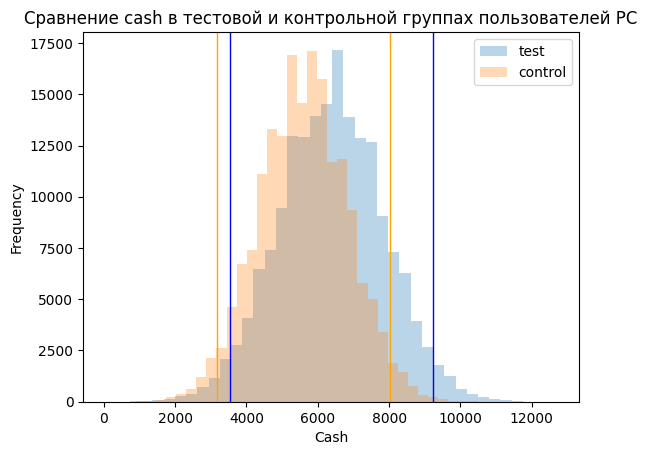

In [31]:
# Графики PC

plt.hist(df_pc_test['cash'], bins=40, alpha=0.3, label='test') # кол-во интервалов (корзин) для распределения, прозрачность, метка для легенды
plt.hist(df_pc_control['cash'], bins=40, alpha=0.3, label='control')

plt.axvline(ci_test[0], color='blue', linewidth=1) #цвет, пунктир linestyle='dashed', толщина
plt.axvline(ci_test[1], color='blue', linewidth=1)
plt.axvline(ci_control[0], color='orange', linewidth=1)
plt.axvline(ci_control[1], color='orange', linewidth=1)

plt.title('Сравнение cash в тестовой и контрольной группах пользователей PC')
plt.ylabel('Frequency') #название осей
plt.xlabel('Cash')
plt.legend(loc='upper right') #расположение легенды
plt.savefig('pc.png')
plt.show()

In [32]:
# Траты внутриигровой валюты XBOX test

df_xbox_test_mean = df_xbox_test['cash'].mean()
df_xbox_test_std = df_xbox_test['cash'].std()

ci_test = stats.norm.interval(0.95, loc=df_xbox_test_mean, scale=df_xbox_test_std)
print(df_xbox_test_mean)
print(df_xbox_test_std)
print(f'95% доверительный интервал: {ci_test}')

6176.402872104711
1401.3404561719965
95% доверительный интервал: (np.float64(3429.8260479286673), np.float64(8922.979696280754))


In [33]:
# Траты внутриигровой валюты XBOX control

df_xbox_control_mean = df_xbox_control['cash'].mean()
df_xbox_control_std = df_xbox_control['cash'].std()

ci_control = stats.norm.interval(0.95, loc=df_xbox_control_mean, scale=df_xbox_control_std)
print(df_xbox_control_mean)
print(df_xbox_control_std)
print(f'95% доверительный интервал: {ci_control}')

6131.7935219306755
1399.718421946912
95% доверительный интервал: (np.float64(3388.3958264174894), np.float64(8875.191217443862))


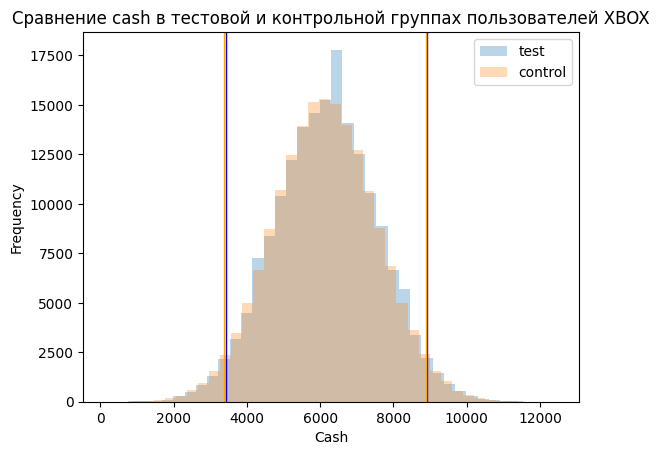

In [34]:
# Графики XBox

plt.hist(df_xbox_test['cash'], bins=40, alpha=0.3, label='test')
plt.hist(df_xbox_control['cash'], bins=40, alpha=0.3, label='control')

plt.axvline(ci_test[0], color='blue', linewidth=1)
plt.axvline(ci_test[1], color='blue', linewidth=1)
plt.axvline(ci_control[0], color='orange', linewidth=1)
plt.axvline(ci_control[1], color='orange', linewidth=1)

plt.title('Сравнение cash в тестовой и контрольной группах пользователей XBOX')
plt.ylabel('Frequency')
plt.xlabel('Cash')
plt.legend(loc='upper right')
plt.savefig('xbox.png')
plt.show()

In [35]:
# Траты внутриигровой валюты PS4 test

df_ps4_test_mean = df_ps4_test['cash'].mean()
df_ps4_test_std = df_ps4_test['cash'].std()

ci_test = stats.norm.interval(0.95, loc=df_ps4_test_mean, scale=df_ps4_test_std)
print(df_ps4_test_mean)
print(df_ps4_test_std)
print(f'95% доверительный интервал: {ci_test}')

6130.4932697934955
1362.2325985307548
95% доверительный интервал: (np.float64(3460.5664381068054), np.float64(8800.420101480186))


In [36]:
# Траты внутриигровой валюты PS4 control

df_ps4_control_mean = df_ps4_control['cash'].mean()
df_ps4_control_std = df_ps4_control['cash'].std()

ci_control = stats.norm.interval(0.95, loc=df_ps4_control_mean, scale=df_ps4_control_std)
print(df_ps4_control_mean)
print(df_ps4_control_std)
print(f'95% доверительный интервал: {ci_control}')

5681.936163822829
1334.394540178971
95% доверительный интервал: (np.float64(3066.57092390516), np.float64(8297.3014037405))


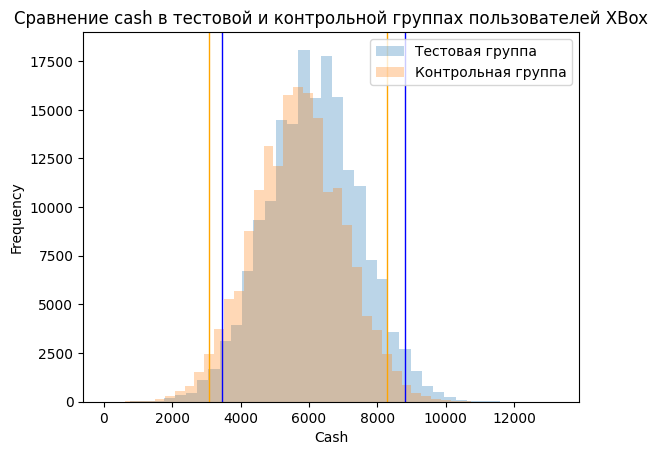

In [37]:
# Графики PS4

plt.hist(df_ps4_test['cash'], bins=40, alpha=0.3, label='Тестовая группа')
plt.hist(df_ps4_control['cash'], bins=40, alpha=0.3, label='Контрольная группа')

plt.axvline(ci_test[0], color='blue', linewidth=1)
plt.axvline(ci_test[1], color='blue', linewidth=1)
plt.axvline(ci_control[0], color='orange', linewidth=1)
plt.axvline(ci_control[1], color='orange', linewidth=1)

plt.title('Сравнение cash в тестовой и контрольной группах пользователей XBox')
plt.ylabel('Frequency')
plt.xlabel('Cash')
plt.legend(loc='upper right')
plt.savefig('ps4.png')
plt.show()

In [38]:
# ARPU для PC test
df_pc_test_mean1 = round(df_pc_test_mean)
df_pc_test_mean1

6382

In [39]:
# ARPU для PC control
df_pc_control_mean1 = round(df_pc_control_mean)
df_pc_control_mean1

5587

In [40]:
# ARPU для XBox test
df_xbox_test_mean1 = round(df_xbox_test_mean)
df_xbox_test_mean1

6176

In [41]:
# ARPU для XBox control
df_xbox_control_mean1 = round(df_xbox_control_mean)
df_xbox_control_mean1

6132

In [42]:
# ARPU для PS4 test
df_ps4_test_mean1 = round(df_ps4_test_mean)
df_ps4_test_mean1

6130

In [43]:
# ARPU для PS4 control
df_ps4_control_mean1 = round(df_ps4_control_mean)
df_ps4_control_mean1

5682

In [44]:
# ARPPU для PC test
df_pc_test_money_mean = df_pc_test['money'].mean()
df_pc_test_money_mean1 = round(df_pc_test_money_mean, 2)
df_pc_test_money_mean1

np.float64(6.27)

In [45]:
# ARPPU для PC control
df_pc_control_money_mean = df_pc_control['money'].mean()
df_pc_control_money_mean1 = round(df_pc_control_money_mean, 2)
df_pc_control_money_mean1

np.float64(5.65)

In [46]:
# ARPPU для XBox test
df_xbox_test_money_mean = df_xbox_test['money'].mean()
df_xbox_test_money_mean1 = round(df_xbox_test_money_mean, 2)
df_xbox_test_money_mean1

np.float64(6.13)

In [47]:
# ARPPU для XBox control
df_xbox_control_money_mean = df_xbox_control['money'].mean()
df_xbox_control_money_mean1 = round(df_xbox_control_money_mean, 2)
df_xbox_control_money_mean1

np.float64(6.1)

In [48]:
# ARPPU для PS4 test
df_ps4_test_money_mean = df_ps4_test['money'].mean()
df_ps4_test_money_mean1 = round(df_ps4_test_money_mean, 2)
df_ps4_test_money_mean1

np.float64(6.08)

In [50]:
# ARPPU для PS4 control
df_ps4_control_money_mean = df_ps4_control['money'].mean()
df_ps4_control_money_mean1 = round(df_ps4_control_money_mean, 2)
df_ps4_control_money_mean1

np.float64(5.74)

In [51]:
df_unique.head()

,user_id,cash,money,platform,group
0,00036L-1T885I,7600,3.97,XBox,control
8,0004MK-MRBUKF,6150,5.95,PS4,control
16,0004MK-VW0O9L,6300,4.96,PC,test
24,0005S4-UEC6BE,5000,5.95,PC,test
32,0007I5-EWUD6O,6350,6.94,PC,test


In [52]:
df_unique.to_csv('unique.csv', sep=';')

In [62]:
df_unique.to_excel('unique.xlsx')

ValueError: This sheet is too large! Your sheet size is: 1079303, 5 Max sheet size is: 1048576, 16384

In [53]:
df_cash = pd.read_csv('Cash.csv')

In [54]:
df_cash = df_cash[~df_cash['user_id'].isin(list_of_chiters)] #удаляем выявленных читеров

In [55]:
df_cash = df_cash[~df_cash['user_id'].isin(chiter_list)] #удаляем невыявленных читеров

In [56]:
df_cash.to_csv('Cash_withoutCheaters.csv', sep=';')

In [57]:
df_money = pd.read_csv('Money.csv')

In [58]:
df_money = df_money[~df_money['user_id'].isin(list_of_chiters)] #удаляем выявленных читеров

In [59]:
df_money = df_money[~df_money['user_id'].isin(chiter_list)] #удаляем невыявленных читеров

In [61]:
df_money.to_csv('Money.csv', sep=';')